<a href="https://colab.research.google.com/github/KaRtHiK-56/Machine-Learning-Projects/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This case study is based on the  heart attack datasets were collected at Zheen hospital in Erbil, Iraq, from January 2019 to May 2019.**

**The dataset contains information about 1319 patients, which also indiactes about the person is affected by heart disease or not.**

**The goal is to create a predictive model which can predict wheather the person will be affected by heart disease or not in the future.**



In this case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios. You can use this flow as a template to solve any supervised ML classification problem.

The flow of the case study is as below:

Reading the data in python

Defining the problem statement

Identifying the Target variable

Looking at the distribution of Target variable

Basic Data exploration

Rejecting useless columns

Visual Exploratory Data Analysis for data distribution

Feature Selection based on data distribution

Outlier treatment

Missing Values treatment

Visual correlation analysis

Statistical correlation analysis (Feature Selection)

Converting data to numeric for ML

Sampling and K-fold cross validation

Trying multiple classification algorithms

Selecting the best Model

Deploying the best model in production



# Importing Necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [ ]:
data=pd.read_csv('Medicaldataset.csv')

In [ ]:
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


# Data Description

The attributes of this dataset are:

**Age** : The age of the patient .

**Gender** : Gender of the Patient.

**Heart rate** : Heart rate is the frequency of the heartbeat measured by the number of contractions of the heart per minute.

**Systolic blood pressure** : Systolic blood pressure, or the top number, is the amount of pressure experienced by the arteries while the heart is beating.

**Diastolic blood pressure** :  Diastolic blood pressure (the bottom number) is the amount of pressure in the arteries while the heart is resting in between heart beats.

**Blood sugar** : The concentration of glucose in the blood.

**ck-mb** :Creatine kinase (CK) is an enzyme (a molecule that helps speed up certain chemical reactions) that occurs naturally inside muscle cells throughout your body.

**Troponin** with negative or positive output : Troponin is a type of protein found in the muscles of your heart.

According to the provided information, the medical dataset classifies either heart attack or none. The gender column in the data is normalized: the male is set to 1 and the female to 0. The glucose column is set to 1 if it is > 120; otherwise, 0. As for the output, positive is set to 1 and negative to 0.

## Defining the problem Statement

Create a Predictive model which can tell if a person will be affected by heart disease or not?

Target Variable: Results
Predictors: Age, Gender etc.

Positive=0 The passenger died
Negative=1 The passenger survived

## Looking at the distribution of the target variable

In [ ]:
results=data.groupby('Result').size()
results.count()

2

In [ ]:
res=data['Result'].value_counts()
res=pd.DataFrame(res)
res

,Result
positive,810
negative,509


<Axes: >

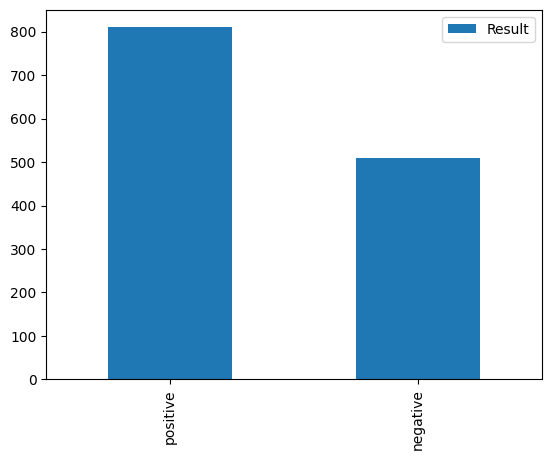

In [ ]:
res.plot(kind='bar')

## Basic Data Exploration

In [ ]:
data.size

11871

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
data.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [ ]:
data.shape

(1319, 9)

In [ ]:
data.ndim

2

In [ ]:
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [ ]:
data.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [ ]:
data.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.nunique()

Age                          75
Gender                        2
Heart rate                   79
Systolic blood pressure     116
Diastolic blood pressure     73
Blood sugar                 244
CK-MB                       700
Troponin                    352
Result                        2
dtype: int64

## Visual Data Visualisation and Data Distribution

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Heart rate'}>,
        <Axes: title={'center': 'Systolic blood pressure'}>],
       [<Axes: title={'center': 'Diastolic blood pressure'}>,
        <Axes: title={'center': 'Blood sugar'}>,
        <Axes: title={'center': 'CK-MB'}>],
       [<Axes: title={'center': 'Troponin'}>, <Axes: >, <Axes: >]],
      dtype=object)

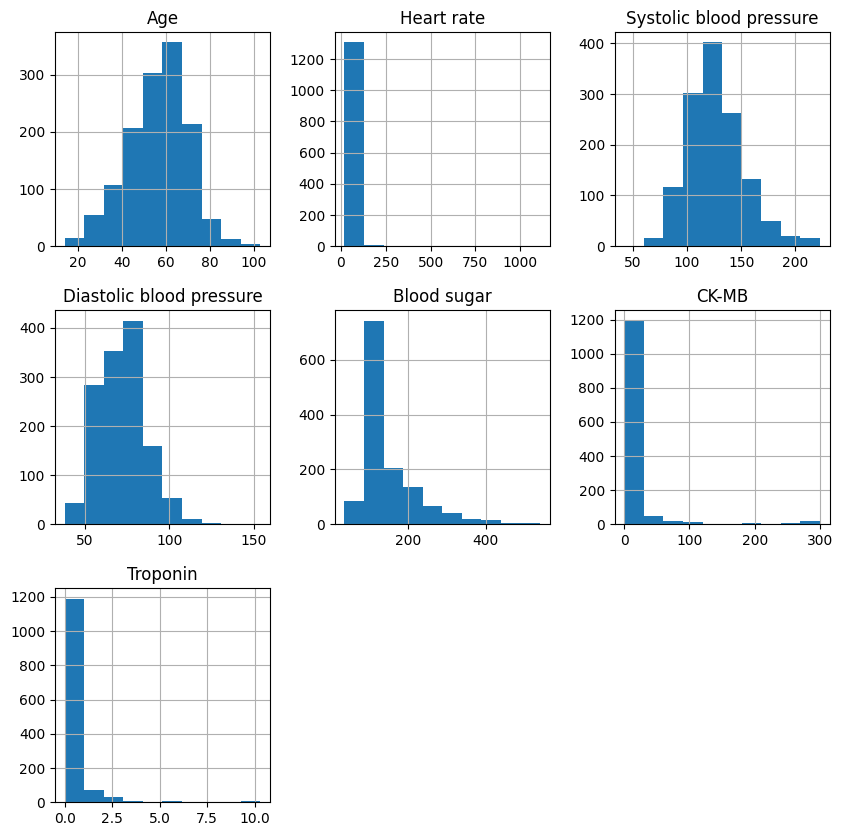

In [ ]:
data.hist(['Age','Heart rate','Systolic blood pressure',
'Diastolic blood pressure',
'Blood sugar'  ,
'CK-MB'      ,
'Troponin'],figsize=(10,10))

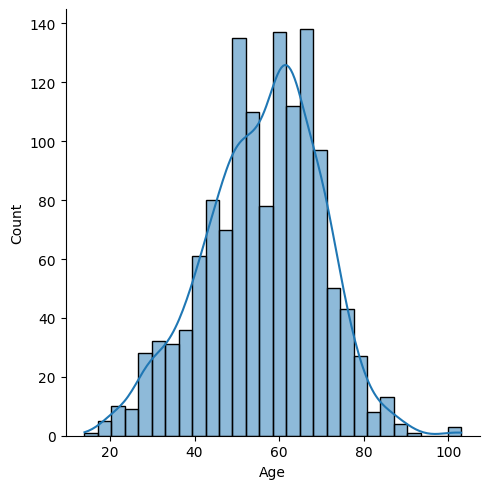

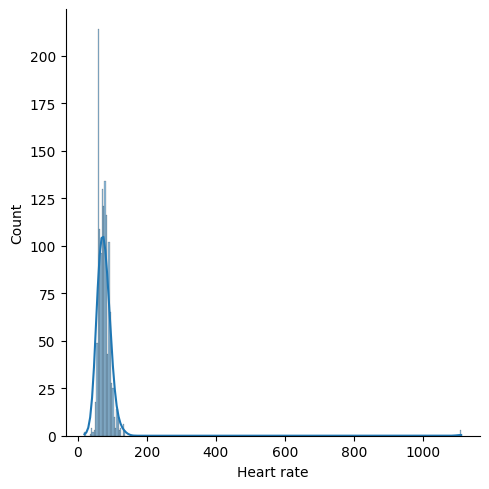

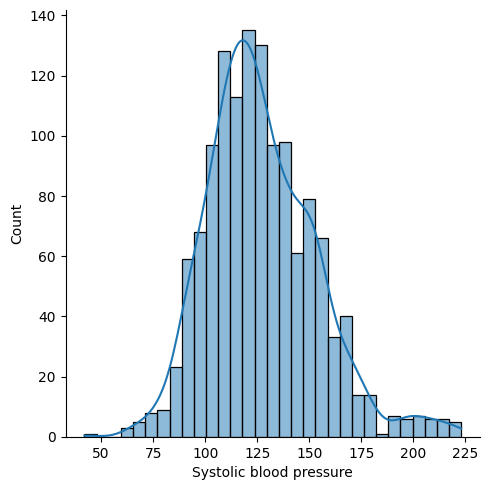

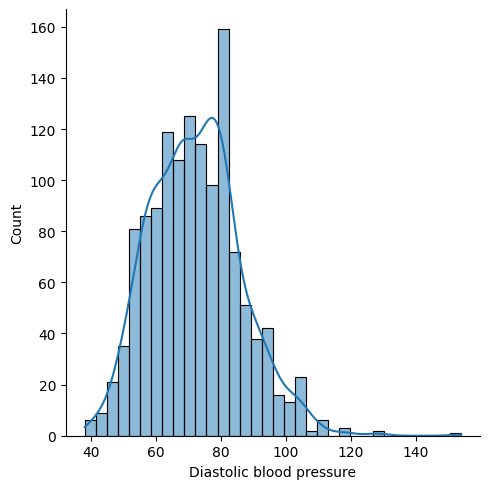

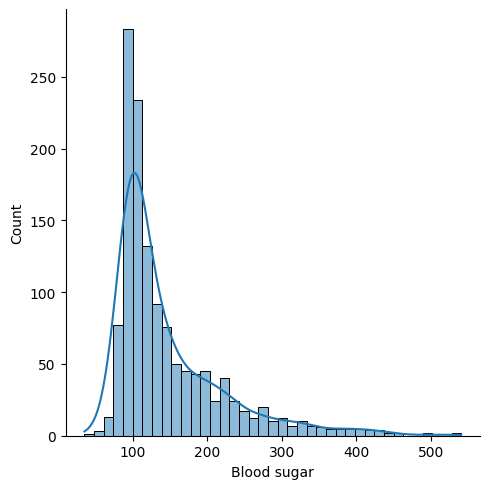

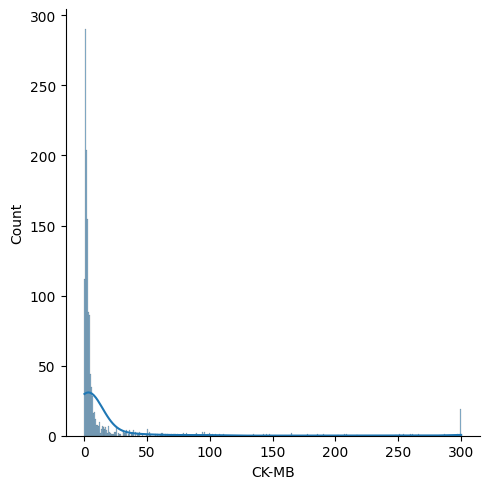

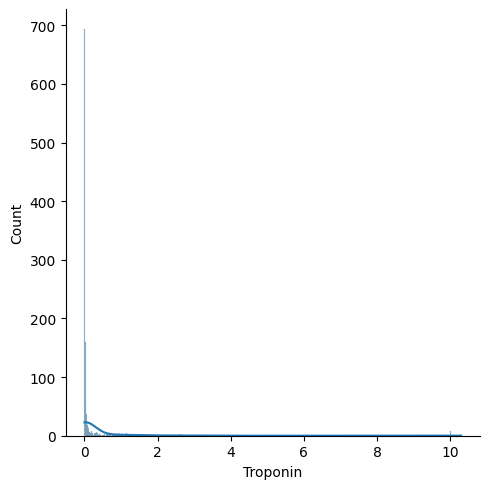

In [ ]:
ContinuousCols=data[['Age','Heart rate','Systolic blood pressure','Diastolic blood pressure','Blood sugar','CK-MB','Troponin']]
for kdes in ContinuousCols:
    sns.displot(data[kdes],kde=True)

Age data is normally distributed and has few outliers to remove.

Heart rate is Right skewed data and outliers has to be treated.

Systolic blood pressure is similar to normal distribution.

Diabolic blood pressure is right skewed data.

Blood sugar level is right skewed data.

Ck-mb is right skewed and needs outliers to be treated.

Troponin is right skewed and needs outliers to be treated.


<Axes: >

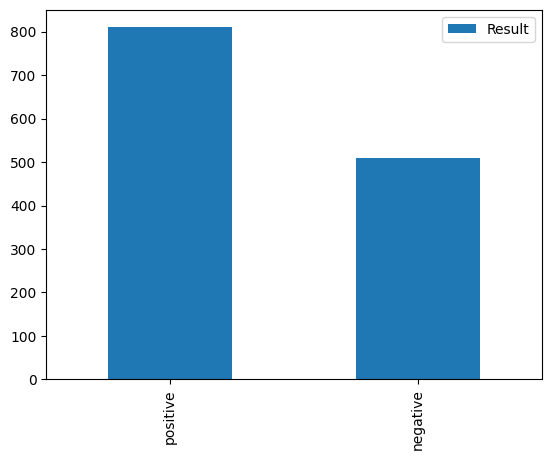

In [ ]:
res=data['Result'].value_counts()
res=pd.DataFrame(res)
res.plot(kind='bar')

<Axes: >

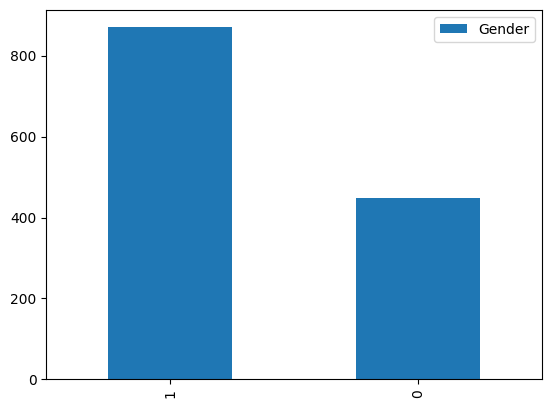

In [ ]:
gen=data['Gender'].value_counts()
gen=pd.DataFrame(gen)
gen.plot(kind='bar')

## Outlier Treatment

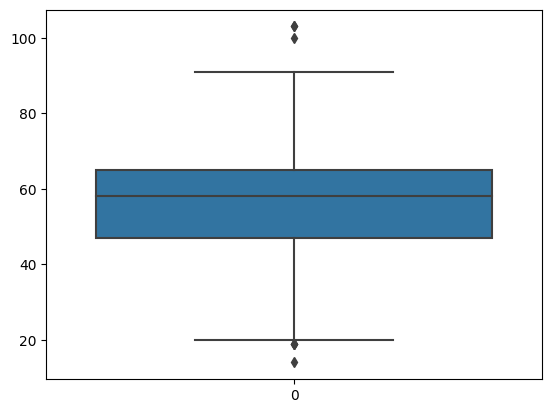

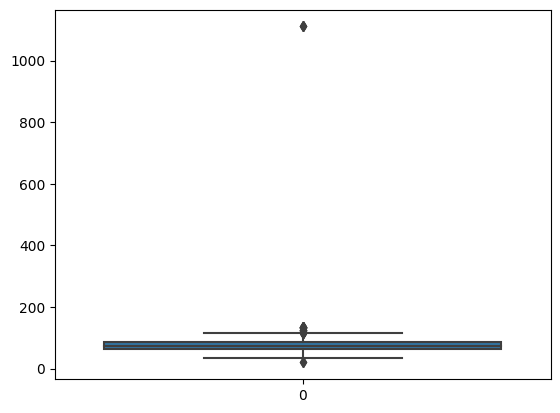

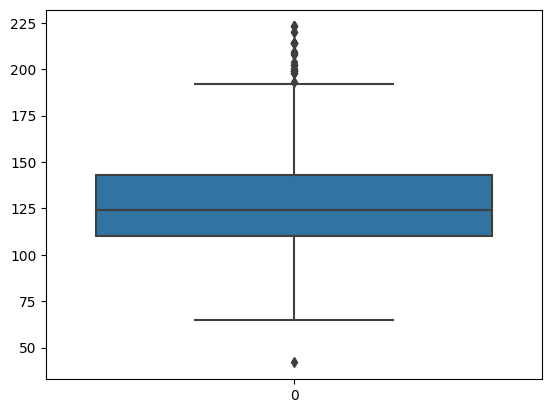

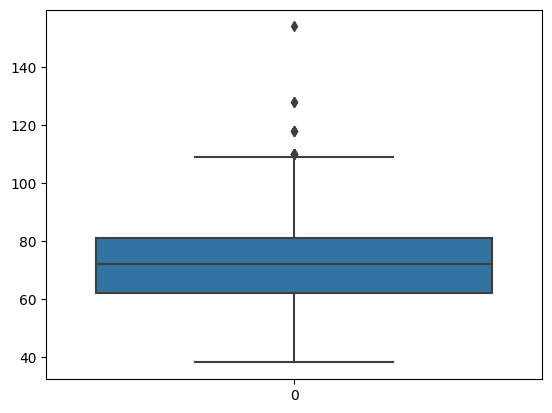

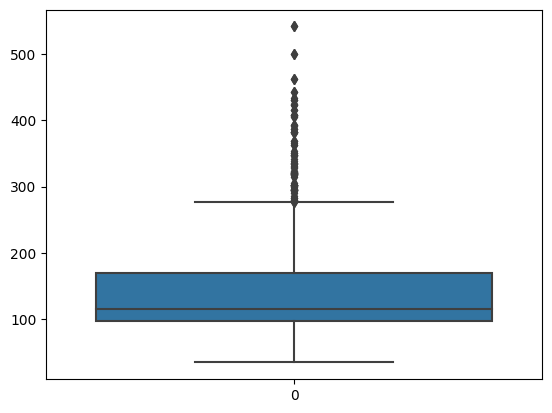

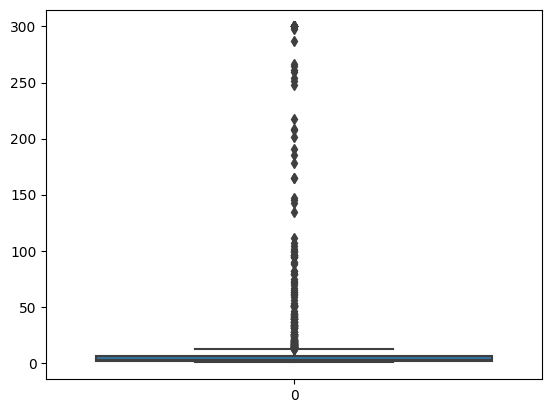

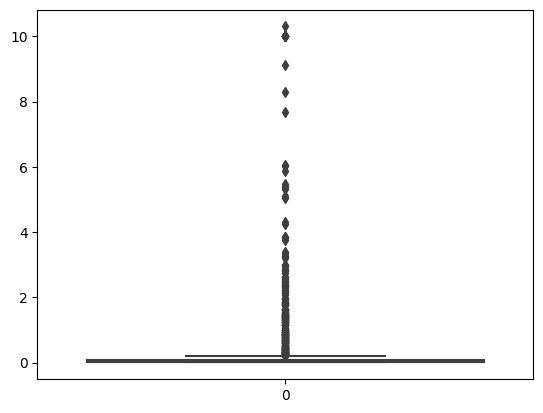

In [ ]:
for box in ContinuousCols:
    plt.figure()
    plt.tight_layout()
    sns.boxplot(data[box])

Age --> Z score

Heart rate --> IQR

Systolic blood pressure --> Z score

Diabolic blood pressure --> IQR

Blood sugar level --> IQR

Ck-mb --> IQR

Troponin --> IQR


In [ ]:
ageupper = data['Age'].mean() + 3*data['Age'].std()
agelower = data['Age'].mean() - 3*data['Age'].std()
print(agelower)
print(ageupper)

15.249865550535418
97.13375840700817


In [ ]:
sbpupper = data['Systolic blood pressure'].mean() + 3*data['Systolic blood pressure'].std()
sbplower = data['Systolic blood pressure'].mean() - 3*data['Systolic blood pressure'].std()
print(sbplower)
print(sbpupper)

48.80242240806359
205.53874514311156


In [ ]:
data['Age'] = np.where(
    data['Age']>ageupper,
    ageupper,
    np.where(
        data['Age']<agelower,
        agelower,
        data['Age']
    )
)

In [ ]:
data['Systolic blood pressure'] = np.where(
    data['Systolic blood pressure']>sbpupper,
    sbpupper,
    np.where(
        data['Systolic blood pressure']<sbplower,
        sbplower,
        data['Systolic blood pressure']
    )
)

In [ ]:
hrq1=data['Heart rate'].quantile(0.25)
hrq3=data['Heart rate'].quantile(0.75)
hriqr=hrq3-hrq1
print(hrq1)
print(hrq3)
print(hriqr)
hrlower = hrq1 - (1.5 * hriqr)
hrupper = hrq3 + (1.5 * hriqr)
print(hrlower)
print(hrupper)

64.0
85.0
21.0
32.5
116.5


In [ ]:
dbq1=data['Diastolic blood pressure'].quantile(0.25)
dbq3=data['Diastolic blood pressure'].quantile(0.75)
dbiqr=dbq3-dbq1
print(dbq1)
print(dbq3)
print(dbiqr)
dblower = dbq1 - (1.5 * dbiqr)
dbupper = dbq3 + (1.5 * dbiqr)
print(dblower)
print(dbupper)

62.0
81.0
19.0
33.5
109.5


In [ ]:
bsq1=data['Blood sugar'].quantile(0.25)
bsq3=data['Blood sugar'].quantile(0.75)
bsiqr=bsq3-bsq1
print(bsq1)
print(bsq3)
print(bsiqr)
bslower = bsq1 - (1.5 * bsiqr)
bsupper = bsq3 + (1.5 * bsiqr)
print(bslower)
print(bsupper)

98.0
169.5
71.5
-9.25
276.75


In [ ]:
ckq1=data['CK-MB'].quantile(0.25)
ckq3=data['CK-MB'].quantile(0.75)
ckiqr=ckq3-ckq1
print(ckq1)
print(ckq3)
print(ckiqr)
cklower = hrq1 - (1.5 * ckiqr)
ckupper = hrq3 + (1.5 * ckiqr)
print(cklower)
print(ckupper)

1.6549999999999998
5.805
4.15
57.775
91.225


In [ ]:
trq1=data['Troponin'].quantile(0.25)
trq3=data['Troponin'].quantile(0.75)
triqr=trq3-trq1
print(trq1)
print(trq3)
print(triqr)
trlower = trq1 - (1.5 * triqr)
trupper = trq3 + (1.5 * triqr)
print(trlower)
print(trupper)

0.006
0.08549999999999999
0.07949999999999999
-0.11324999999999998
0.20475


In [ ]:
data['Heart rate'] = np.where(
    data['Heart rate'] > hrupper,
    hrupper,
    np.where(
        data['Heart rate'] < hrlower,
        hrlower,
        data['Heart rate']
    )
)

In [ ]:
data['Diastolic blood pressure'] = np.where(
    data['Diastolic blood pressure'] > dbupper,
    dbupper,
    np.where(
        data['Diastolic blood pressure'] < dblower,
        dblower,
        data['Diastolic blood pressure']
    )
)

In [ ]:
data['Blood sugar'] = np.where(
    data['Blood sugar'] > bsupper,
    bsupper,
    np.where(
        data['Blood sugar'] < bslower,
        bslower,
        data['Blood sugar']
    )
)

In [ ]:
data['CK-MB'] = np.where(
    data['CK-MB'] > ckupper,
    ckupper,
    np.where(
        data['CK-MB'] < cklower,
        cklower,
        data['CK-MB']
    )
)

In [ ]:
data['Troponin'] = np.where(
    data['Troponin'] > trupper,
    trupper,
    np.where(
        data['Troponin'] < trlower,
        trlower,
        data['Troponin']
    )
)

In [ ]:
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64.0,1,66.0,160.0,83.0,160.00,57.775,0.01200,negative
1,21.0,1,94.0,98.0,46.0,276.75,57.775,0.20475,positive
2,55.0,1,64.0,160.0,77.0,270.00,57.775,0.00300,negative
3,64.0,1,70.0,120.0,55.0,270.00,57.775,0.12200,positive
4,55.0,1,64.0,112.0,65.0,276.75,57.775,0.00300,negative
...,...,...,...,...,...,...,...,...,...
1314,44.0,1,94.0,122.0,67.0,204.00,57.775,0.00600,negative
1315,66.0,1,84.0,125.0,55.0,149.00,57.775,0.17200,positive
1316,45.0,1,85.0,168.0,104.0,96.00,57.775,0.20475,positive
1317,54.0,1,58.0,117.0,68.0,276.75,57.775,0.20475,positive


In [ ]:
data.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.181692,0.659591,75.931766,127.062897,72.185747,141.249962,59.407058,0.058548
std,13.608999,0.474027,14.807730,25.738432,13.731063,59.267678,7.006929,0.078493
min,15.249866,0.000000,32.500000,48.802422,38.000000,35.000000,57.775000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,57.775000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,57.775000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,57.775000,0.085500
max,97.133758,1.000000,116.500000,205.538745,109.500000,276.750000,91.225000,0.204750


## Converitng categorical values into numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Result']= le.fit_transform(data['Result'])

In [ ]:
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64.0,1,66.0,160.0,83.0,160.00,57.775,0.01200,0
1,21.0,1,94.0,98.0,46.0,276.75,57.775,0.20475,1
2,55.0,1,64.0,160.0,77.0,270.00,57.775,0.00300,0
3,64.0,1,70.0,120.0,55.0,270.00,57.775,0.12200,1
4,55.0,1,64.0,112.0,65.0,276.75,57.775,0.00300,0
...,...,...,...,...,...,...,...,...,...
1314,44.0,1,94.0,122.0,67.0,204.00,57.775,0.00600,0
1315,66.0,1,84.0,125.0,55.0,149.00,57.775,0.17200,1
1316,45.0,1,85.0,168.0,104.0,96.00,57.775,0.20475,1
1317,54.0,1,58.0,117.0,68.0,276.75,57.775,0.20475,1


In [ ]:
data.corr()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
Age,1.000000,-0.092437,-0.003955,0.016726,0.001899,-0.014529,0.024217,0.169416,0.238034
Gender,-0.092437,1.000000,0.005930,0.012902,-0.008521,0.003073,-0.000218,0.143746,0.094432
Heart rate,-0.003955,0.005930,1.000000,-0.040635,0.131413,0.004934,0.006105,0.018429,0.002396
Systolic blood pressure,0.016726,0.012902,-0.040635,1.000000,0.591888,0.018410,-0.022819,0.037969,-0.021611
Diastolic blood pressure,0.001899,-0.008521,0.131413,0.591888,1.000000,-0.012729,-0.012520,0.035155,-0.011512
Blood sugar,-0.014529,0.003073,0.004934,0.018410,-0.012729,1.000000,0.043008,0.014057,-0.027213
CK-MB,0.024217,-0.000218,0.006105,-0.022819,-0.012520,0.043008,1.000000,-0.042437,0.184709
Troponin,0.169416,0.143746,0.018429,0.037969,0.035155,0.014057,-0.042437,1.000000,0.517664
Result,0.238034,0.094432,0.002396,-0.021611,-0.011512,-0.027213,0.184709,0.517664,1.000000


##Statistical correlation analysis (Feature Selection)

<Axes: >

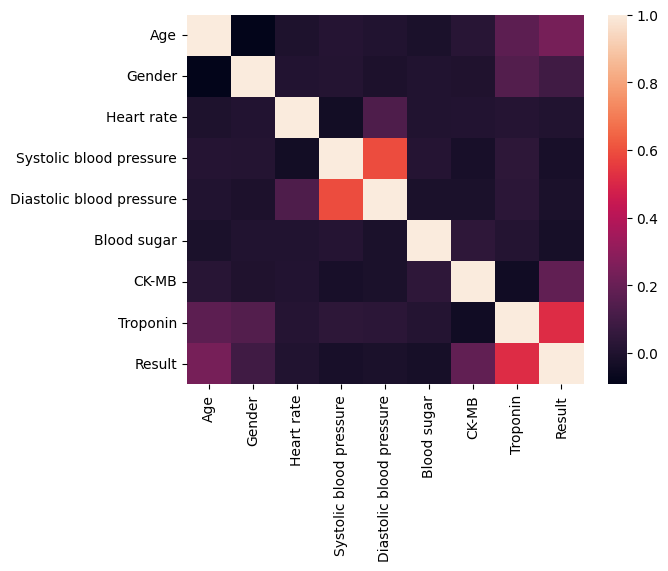

In [ ]:
sns.heatmap(data=data.corr())

Null Hypothysis(H0): There is NO relation between the given variables ie. all are in same range.

Alternate Hypothesis(H1): There is relation between the given variables ie. all are in different range.


In [ ]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
ContinuousVariables=['Age','Heart rate','Systolic blood pressure','Diastolic blood pressure','Blood sugar','CK-MB','Troponin']
FunctionAnova(inpData=data, TargetVariable='Result', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Age is correlated with Result | P-Value: 1.90117391312857e-18
Heart rate is NOT correlated with Result | P-Value: 0.9307330569439741
Systolic blood pressure is NOT correlated with Result | P-Value: 0.4329137589203014
Diastolic blood pressure is NOT correlated with Result | P-Value: 0.6761717719845903
Blood sugar is NOT correlated with Result | P-Value: 0.3233624729895339
CK-MB is correlated with Result | P-Value: 1.3782743585693059e-11
Troponin is correlated with Result | P-Value: 2.612080487691413e-91


['Age', 'CK-MB', 'Troponin']

In [ ]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [ ]:
CategoricalVariables=['Gender']

# Calling the function
FunctionChisq(inpData=data,
              TargetVariable='Result',
              CategoricalVariablesList= CategoricalVariables)

Gender is correlated with Result | P-Value: 0.0007519186100483854


['Gender']

In [ ]:
data=data[['Age','Gender','Heart rate','CK-MB','Troponin','Result']]
data

,Age,Gender,Heart rate,CK-MB,Troponin,Result
0,64.0,1,66.0,57.775,0.01200,0
1,21.0,1,94.0,57.775,0.20475,1
2,55.0,1,64.0,57.775,0.00300,0
3,64.0,1,70.0,57.775,0.12200,1
4,55.0,1,64.0,57.775,0.00300,0
...,...,...,...,...,...,...
1314,44.0,1,94.0,57.775,0.00600,0
1315,66.0,1,84.0,57.775,0.17200,1
1316,45.0,1,85.0,57.775,0.20475,1
1317,54.0,1,58.0,57.775,0.20475,1


In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [ ]:
x.shape

(1319, 5)

In [ ]:
y.shape

(1319,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(923, 5)
(396, 5)
(923,)
(396,)


In [ ]:
from sklearn.svm import SVC
svc=SVC(C=10.0,kernel='rbf')
svc.fit(x_train, y_train)

In [ ]:
svc.score(x_train,y_train)

0.9783315276273022

In [ ]:
yp1=svc.predict(x_test)
yp1=pd.DataFrame(yp1)
yp1

In [ ]:
y_test=pd.DataFrame(y_test)
y_test

In [ ]:
p1=pd.concat([y_test,yp1],axis=1)
p1

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,log_loss
cm=confusion_matrix(y_test,yp1)
cm

array([[132,   7],
       [  0, 257]])

In [ ]:
print(classification_report(y_test,yp1))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97       139
           1       0.97      1.00      0.99       257

    accuracy                           0.98       396
   macro avg       0.99      0.97      0.98       396
weighted avg       0.98      0.98      0.98       396



In [ ]:
logloss=log_loss(y_test,yp1)
logloss

0.637135287181364

In [ ]:
b=accuracy_score(y_test,yp1)
b

0.9823232323232324

In [ ]:
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(svc, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Final Average Accuracy of the model: 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = { 'C'    : [1,2,3,4,5,6,7,8,9,10,20,22,25,27,30,32,35,40,50],
              'degree' : [1,2,3,4,5]
                 }
svc = GridSearchCV(estimator=svc, param_grid = parameters, cv = 5, n_jobs=-1)
svc.fit(x_train, y_train)

print(" Results from Grid Search " )
print()
print("\n The best estimator across ALL searched params:\n",
          svc.best_estimator_)
print("\n The best score across ALL searched params:\n",
          svc.best_score_)
print("\n The best parameters across ALL searched params:\n",
          svc.best_params_)

 Results from Grid Search 


 The best estimator across ALL searched params:
 SVC(C=20, degree=1)

 The best score across ALL searched params:
 1.0

 The best parameters across ALL searched params:
 {'C': 20, 'degree': 1}
